In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 4.1.3 Least squares for classifiction

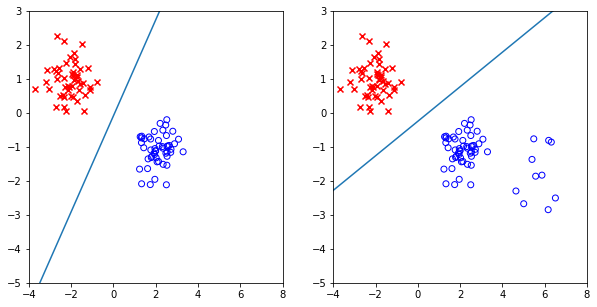

In [13]:
X1 = np.random.multivariate_normal([2, -1], .3*np.eye(2), 50)
X2 = np.random.multivariate_normal([-2, 1], .3*np.eye(2), 50)
X3 = np.random.multivariate_normal([6, -2], .4*np.eye(2), 10)
Y = np.r_[np.ones(50), -np.ones(50)].reshape(-1,1)
X = np.r_[X1, X2]
X = np.c_[np.ones(100), X]

plt.figure(figsize=[10, 5])
plt.subplot(1, 2, 1)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', color='', edgecolors='blue')
plt.scatter(X2[:, 0], X2[:, 1], marker='x', color='red')
plt.xlim(-4, 8)
plt.ylim(-5, 3)
# plt.gca().set_aspect('equal', adjustable='box')

w = np.linalg.pinv(X.T@X)@X.T@Y
plt.plot(np.linspace(-4, 8, 100), -(w[1]*np.linspace(-4, 8, 100) + w[0])/w[2])

Y = np.r_[np.ones(60), -np.ones(50)].reshape(-1, 1)
X = np.r_[X1, X3, X2]
X = np.c_[np.ones(110), X]
plt.subplot(1, 2, 2)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', color='', edgecolors='blue')
plt.scatter(X2[:, 0], X2[:, 1], marker='x', color='red')
plt.scatter(X3[:, 0], X3[:, 1], marker='o', color='', edgecolors='blue')
plt.xlim(-4, 8)
plt.ylim(-5, 3)

w = np.linalg.pinv(X.T@X)@X.T@Y
plt.plot(np.linspace(-4, 8, 100), -(w[1]*np.linspace(-4, 8, 100) + w[0])/w[2])

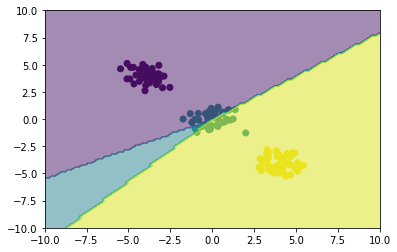

In [52]:
def prediction(X, W):
    y = X @ W
    return y.argmax(axis=1)

N1, N2, N3 = 50, 50, 50
train_X1 = np.random.multivariate_normal(np.array([-4, 4]), .4*np.eye(2), N1)
train_X2 = np.random.multivariate_normal(np.array([0, 0]), .4*np.eye(2), N2)
train_X3 = np.random.multivariate_normal(np.array([4, -4]), .4*np.eye(2), N3)
train_X = np.r_[train_X1, train_X2, train_X3]
train_y = np.r_[np.zeros(N1), np.ones(N2), 2*np.ones(N3)].reshape(-1, 1)
num_labels = train_y.shape[0]
num_classes = 3
index_offset = np.arange(num_labels) * num_classes
train_Y = np.zeros([num_labels, num_classes])
train_Y.flat[index_offset + train_y.astype(int).flatten()] = 1

plt.figure()
plt.scatter(train_X[:,0],train_X[:,1],c = train_y.flatten())

# train least square model for multi-class classification
train_X = np.c_[np.ones([N1+N2+N3,1]), train_X]
W = np.linalg.pinv(train_X.T@train_X)@train_X.T@train_Y

x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
plt.contourf(X, Y, prediction(np.c_[np.ones([10000, 1]), X.reshape(-1,1), Y.reshape(-1,1)], W).reshape(100, 100), alpha = 0.5)